In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected='true')
import os
import datetime 
from prophet import Prophet
from sklearn.metrics import r2_score

In [18]:
df = pd.read_excel(r'C:\Users\Maite\Downloads\Ejemplo Tenerife.xlsx', parse_dates=True)
df.head()

,Año,Cantidad de Turistas
0,1978-12-31,946211
1,1979-12-31,917333
2,1980-12-31,817551
3,1981-12-31,932585
4,1982-12-31,1044333


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Año                   46 non-null     datetime64[ns]
 1   Cantidad de Turistas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 868.0 bytes


In [93]:
split_date = '2013-12-31'
split_date = pd.to_datetime(split_date)

In [94]:
df_model = df.copy()
df_model.head()

,Año,Cantidad de Turistas
0,1978-12-31,946211
1,1979-12-31,917333
2,1980-12-31,817551
3,1981-12-31,932585
4,1982-12-31,1044333


In [95]:
df_model.reset_index(inplace=True)
df_model.rename(columns={'Año':'ds','Cantidad de Turistas':'y'},inplace=True)

In [96]:
df_train = df_model[df_model['ds'] <= split_date]
df_test = df_model[df_model['ds'] > split_date]

In [97]:
prophet = Prophet()

In [98]:
prophet.fit(df_train)

19:01:50 - cmdstanpy - INFO - Chain [1] start processing


19:01:51 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
df_pred = prophet.predict(df_test)

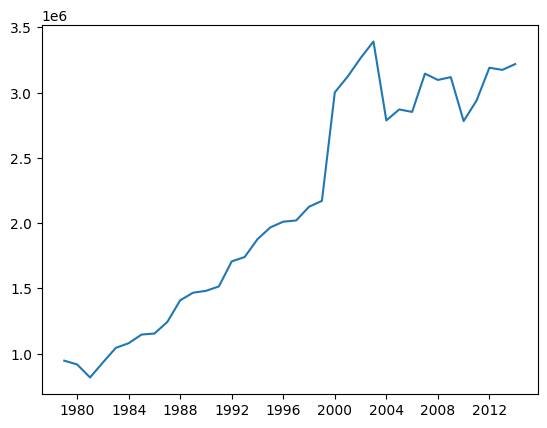

In [100]:
plt.plot(df_train['ds'],df_train['y'])

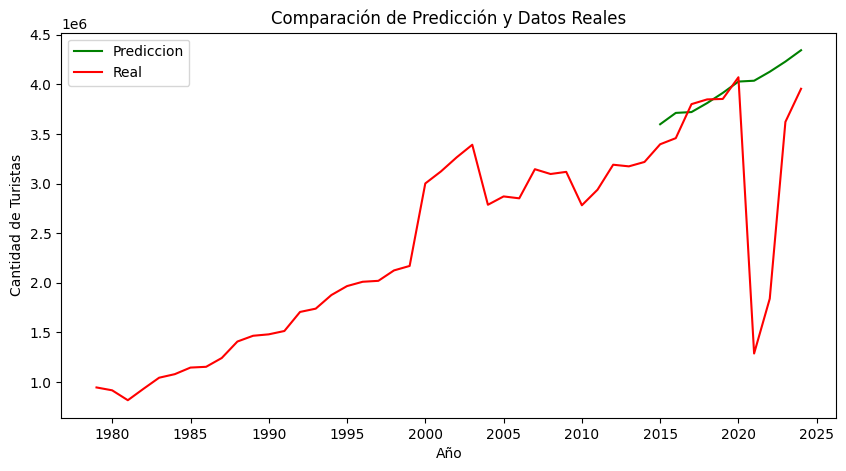

In [101]:
plt.figure(figsize=(10,5))
plt.plot(df_pred['ds'], df_pred['yhat'], label='Prediccion', color='green')
plt.plot(df['Año'], df['Cantidad de Turistas'], label='Real', color='red')


plt.legend()
plt.xlabel('Año')
plt.ylabel('Cantidad de Turistas')
plt.title('Comparación de Predicción y Datos Reales')
plt.show()

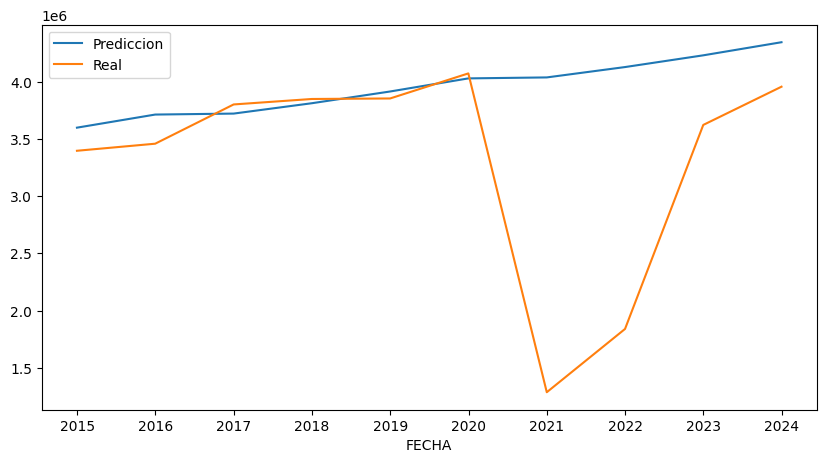

In [102]:
plt.figure(figsize=(10,5))
plt.plot(df_pred['ds'], df_pred['yhat'], label='Prediccion')
plt.plot(df_pred['ds'], df_test['y'], label='Real')


plt.legend()
plt.xlabel('FECHA')
plt.show()

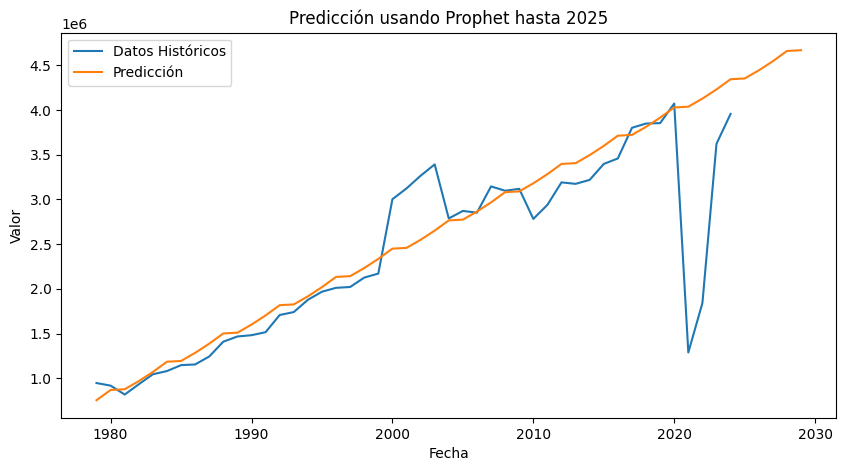

In [109]:
future = prophet.make_future_dataframe(periods=15, freq='YE')
df_pred_2025 = prophet.predict(future)

plt.figure(figsize=(10, 5))
plt.plot(df['Año'], df['Cantidad de Turistas'], label='Datos Históricos')
plt.plot(df_pred_2025['ds'], df_pred_2025['yhat'], label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.title('Predicción usando Prophet hasta 2025')
plt.show()